In [1]:
using Distributions
using Random
using scBayesDeconv
using Plots
using MAT

In [2]:
N = 10000

dataActChiDye = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,0+1]
dataActChi = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,1+1]
dataChiDye = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,2+1]
dataChi = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,3+1]
dataDye = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,4+1]
data = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,5+1]


dataActChiDye2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,6+1]
dataActChi2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,7+1]
dataChiDye2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,8+1]
dataChi2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,9+1]
dataDye2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,1+10]
data2 = matread("Data/Real_2_dye/20200716_FITCA.mat")["intensity"][1:N,1+11];

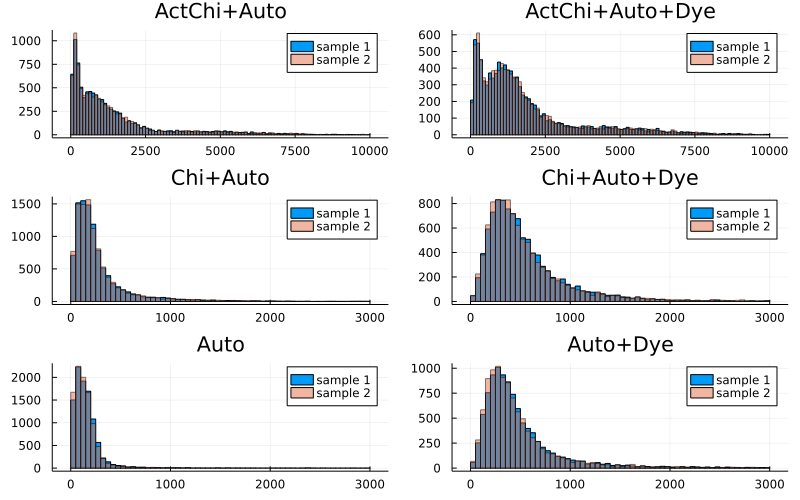

In [3]:
bins = 0:100:10000

p1 = histogram(dataActChi,bins=bins,label="sample 1",title="ActChi+Auto")
histogram!(p1,dataActChi2,bins=bins,label="sample 2",alpha=0.5)

p2 = histogram(dataActChiDye,bins=bins,label="sample 1",title="ActChi+Auto+Dye")
histogram!(p2,dataActChiDye2,bins=bins,label="sample 2",alpha=0.5)

bins = 0:50:3000

p3 = histogram(dataChi,bins=bins,label="sample 1",title="Chi+Auto")
histogram!(p3,dataChi2,bins=bins,label="sample 2",alpha=0.5)

p4 = histogram(dataChiDye,bins=bins,label="sample 1",title="Chi+Auto+Dye")
histogram!(p4,dataChiDye2,bins=bins,label="sample 2",alpha=0.5)

bins = 0:50:3000

p5 = histogram(data,bins=bins,label="sample 1",title="Auto")
histogram!(p5,data2,bins=bins,label="sample 2",alpha=0.5)

p6 = histogram(dataDye,bins=bins,label="sample 1",title="Auto+Dye")
histogram!(p6,dataDye2,bins=bins,label="sample 2",alpha=0.5)

plot(p1,p2,p3,p4,p5,p6,layout=(3,2),size=[800,500])

In [4]:
N = 1000

1000

In [5]:
dn = infiniteGaussianMixture(reshape(data[1:N],N,1));
dt = infiniteGaussianMixtureDeconvolution(reshape(dataDye[1:N],N,1),dn);

GaussianInfiniteMixtureModelDeconvolved(Dict{Symbol, Any}(:α => 1, :κ0 => 0.001, :μ0 => [616.5120758810043], :ν0 => 2, :Σ0 => [1.0884049257129726e6]), MixtureModel[MixtureModel{MvNormal}(K = 20)
components[1] (prior = 0.8059): FullNormal(
dim: 1
μ: [257.46391962859735]
Σ: [188693.21875]
)

components[2] (prior = 0.1115): FullNormal(
dim: 1
μ: [706.1284615239578]
Σ: [149045.203125]
)

components[3] (prior = 0.0121): FullNormal(
dim: 1
μ: [3661.1464101545143]
Σ: [4.7704035e6]
)

components[4] (prior = 0.0034): FullNormal(
dim: 1
μ: [-2610.6147482054894]
Σ: [1.34484048e8]
)

components[5] (prior = 0.0039): FullNormal(
dim: 1
μ: [1825.3575087505847]
Σ: [812151.25]
)

components[6] (prior = 0.0031): FullNormal(
dim: 1
μ: [616.5120758810043]
Σ: [1.088404875e6]
)

components[7] (prior = 0.0181): FullNormal(
dim: 1
μ: [2175.0910883050474]
Σ: [3.48365625e6]
)

components[8] (prior = 0.0056): FullNormal(
dim: 1
μ: [3522.6297355123857]
Σ: [3.77213e6]
)

The rest are omitted ...
, MixtureModel{MvN

In [ ]:
x = -200:10:5000
bins = range(-250,5000,step=30)

#Noise
n = data[1:N]
l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",title="ChannelA (Noise)",color="magenta")
y = zeros(99,length(x))
yaux = pdf(dn.samples[1],reshape(x,1,length(x)))[:,1]
plot!(l1,x,yaux,label="Bayesian samples",color="red",alpha=.2)
for k in 2:100
    yaux = pdf(dn.samples[k],reshape(x,1,length(x)))[:,1]
    plot!(l1,x,yaux,label=nothing,color="red",alpha=.2)
    y[k-1,:] = yaux
end
plot!(l1,x,mean(y,dims=1)[1,:],label="Bayesian mean fitted",color="black",legendfontsize=8)

#Target
l2 = plot()#histogram(vec(t),normalize=true,bins=bins,label="target",title="ChannelB (Target)",color="green")
y = zeros(99,length(x))
yaux = pdf(dt.samples[1],reshape(x,1,length(x)))[:,1]
plot!(l2,x,yaux,label="Bayesian samples",color="red",alpha=.2)
for k in 2:100
    yaux = pdf(dt.samples[k],reshape(x,1,length(x)))[:,1]
    plot!(l2,x,yaux,label=nothing,color="red",alpha=.2)
    y[k-1,:] = yaux
end
plot!(l2,x,mean(y,dims=1)[1,:],label="Bayesian mean deconv.",color="black",legendfontsize=8)
ylims!(0,.003)

#Convolution
c = dataDye[1:N]
l3 = histogram(c,normalize=true,bins=bins,label="convolution",title=string("ChannelA+ChannelB (Convolution)"),color="lightblue")
y = zeros(99,length(x))
yaux = pdf(sample(dt,distribution=:Convolution),reshape(x,1,length(x)))[:,1]
plot!(l3,x,yaux,label="Bayesian samples",color="red",alpha=.2)
for k in 2:100
    yaux = pdf(sample(dt,distribution=:Convolution),reshape(x,1,length(x)))[:,1]
    plot!(l3,x,yaux,label=nothing,color="red",alpha=.2)
    y[k-1,:] = yaux
end
plot!(l3,x,mean(y,dims=1)[1,:],label="Bayesian mean deconv.",color="black",legendfontsize=8)

plot(l1,l3,l2,layout=(3,1),size=[2000,1000])

In [6]:
bins = range(-250,4000,step=30)
l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",title="ChannelA")

bins = range(-250,4000,step=30)
l2 = histogram(vec(t),normalize=true,bins=bins,label="target",title="ChannelB")

bins = range(-250,4000,step=30)
l3 = histogram(vec(c),normalize=true,bins=bins,label="convolution",title="ChannelA+ChannelB")

plot(l1,l2,l3,layout=(3,1))

LoadError: UndefVarError: n not defined

In [ ]:
dn = infiniteGaussianMixture(reshape(n[1:N],N,1),k=2,Σ0 = ones(1,1),κ0=0.01);

In [ ]:
dtfitted = infiniteGaussianMixture(reshape(t[1:N],N,1),k=2,Σ0 = ones(1,1),κ0=0.01);

In [ ]:
dc = infiniteGaussianMixture(reshape(c[1:N],N,1),k=2,Σ0 = ones(1,1),κ0=0.01);

In [ ]:
dt = infiniteGaussianMixtureDeconvolution(reshape(c[1:N],N,1),dn,k=1,Σ0=ones(1,1),κ0=0.01,ν0=0.01,α=1);

In [ ]:
x = -200:10:5000
bins = range(-250,4000,step=30)

#Noise
miae = []
for k in 2:10:100
    f1(x) = pdf(dn.samples[k],x)
    f2(x) = pdf(dt.samples[k],x)
    push!(miae, scBayesDeconv.metrics.MIAE(f1,f2,[-250. 4000.],.5))
end

l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",title="ChannelA")

for k in 2:1:100
    y = ([pdf(dn.samples[k],[j]) for j in x])
    plot!(l1,x,y,style=:dash,label=nothing,title=string("Noise"))
end

#Target
miae = []
for k in 2:10:100
    f1(x) = pdf(dtfitted.samples[k],x)
    f2(x) = pdf(dt.samples[k],x)
    push!(miae, scBayesDeconv.metrics.MIAE(f1,f2,[-250. 4000.],.5))
end

bins = range(-250,4000,step=30)
l2 = histogram(vec(t),normalize=true,bins=bins,label="target",title="ChannelB")

for k in 2:1:100
    y = ([pdf(dt.samples[k],[j]) for j in x])
    plot!(l2,x,y,style=:dash,label=nothing,title=string("Target MIO:",round(mean(miae),digits=3)))
end

#Convolution
miae = []
for k in 2:10:100
    f1(x) = pdf(dc.samples[k],x)
    f2(x) = pdf(dt.samples[k],x)
    push!(miae, scBayesDeconv.metrics.MIAE(f1,f2,[-250. 4000.],.5))
end

bins = range(-250,4000,step=30)
l3 = histogram(vec(c),normalize=true,bins=bins,label="convolution",title=string("ChannelA+ChannelB MIO:",mean(miae)))

plot(l1,l2,l3,layout=(3,1),size=[2000,1000])